### Business Case

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. I will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. Usually, it is less expensive to keep customers, than to acquire new ones, so the focus is to predict the customers who will stay with the company.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age, and if they have partners and dependents


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
%matplotlib inline 

In [2]:
df = pd.read_csv('ChurnData.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
df.shape

(200, 28)

### Exploratory Data Analysis

In [6]:
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,200.0,35.505000,21.640971,1.000,16.75000,33.500,55.2500,72.000
age,200.0,41.165000,13.076803,19.000,31.00000,40.000,51.0000,76.000
address,200.0,11.650000,10.158419,0.000,3.00000,9.000,18.0000,48.000
income,200.0,75.130000,128.430468,9.000,31.00000,48.000,80.0000,1668.000
ed,200.0,2.825000,1.285550,1.000,2.00000,3.000,4.0000,5.000
employ,200.0,10.225000,8.957430,0.000,3.00000,7.500,17.0000,44.000
equip,200.0,0.425000,0.495584,0.000,0.00000,0.000,1.0000,1.000
callcard,200.0,0.705000,0.457187,0.000,0.00000,1.000,1.0000,1.000
wireless,200.0,0.290000,0.454901,0.000,0.00000,0.000,1.0000,1.000
longmon,200.0,11.789250,9.887250,1.100,5.53750,8.250,14.3000,62.300


In [8]:
df.corr()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590,0.763134,0.100214,-0.043274,0.489857,0.043067,0.796355,0.398869,0.676920,-0.050686,0.018791,-0.164921,-0.009747,0.080650,-0.099128,0.864388,0.310045,0.246353,0.134237,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527,0.373547,0.053595,-0.030402,0.203202,-0.003685,0.393370,0.187221,0.336903,0.019555,0.006803,-0.078395,0.020002,0.030625,-0.048279,0.379413,0.093600,0.313359,0.041055,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478,0.421782,-0.015564,-0.125212,0.297395,-0.113143,0.447256,0.129141,0.406964,-0.069627,-0.105812,-0.191058,-0.019967,-0.030494,-0.172171,0.409357,0.018386,0.212929,-0.016841,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635,0.041808,-0.003701,0.000275,-0.013513,-0.027998,0.048374,-0.000262,0.019358,0.085525,0.056977,0.102809,0.081133,-0.031556,-0.041392,0.065595,-0.156498,0.680313,0.030725,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670,-0.072735,-0.000712,0.492999,-0.070990,0.288571,-0.083032,-0.016257,-0.069499,0.233628,0.258698,0.552996,-0.016247,-0.132215,0.427315,-0.054581,-0.007227,0.206718,0.013127,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187,0.363386,0.117962,-0.141651,0.219413,-0.045539,0.385254,0.240498,0.309183,-0.035922,0.038381,-0.250044,0.119708,0.173247,-0.151965,0.377186,0.068718,0.540052,0.131292,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735,-0.097618,-0.090516,0.941065,-0.056590,0.367579,-0.098271,-0.097151,-0.053837,0.264481,0.308633,0.623509,-0.034021,-0.103499,0.603133,-0.113065,-0.027882,0.083494,0.174955,0.275284
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118,0.322514,0.352994,0.026955,0.629955,0.259638,0.342553,0.292555,0.448182,0.226109,0.251069,-0.067146,0.370878,0.311056,-0.045058,0.351030,0.080060,0.156920,0.407553,-0.311451
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000,-0.073043,0.462751,0.527573,0.195387,0.885879,-0.088461,0.328256,0.047773,0.649721,0.667535,0.343631,0.389670,0.382925,0.321433,-0.042637,0.178317,0.033558,0.598156,0.174356
longmon,0.763134,0.373547,0.421782,0.041808,-0.072735,0.363386,-0.097618,0.322514,-0.073043,1.000000,0.083771,-0.070876,0.493439,-0.020392,0.984808,0.338036,0.673179,-0.080503,-0.001372,-0.223929,0.032913,0.060614,-0.124605,0.901631,0.247302,0.122550,0.072519,-0.292026


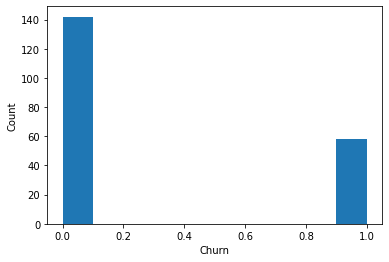

In [9]:
plt.hist(df['churn'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

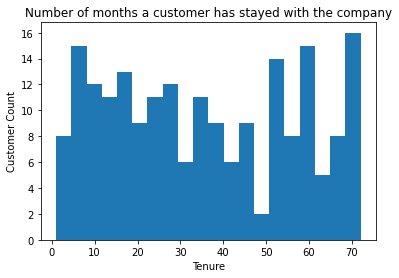

In [10]:
plt.hist(df['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Customer Count')
plt.title('Number of months a customer has stayed with the company')
plt.show()

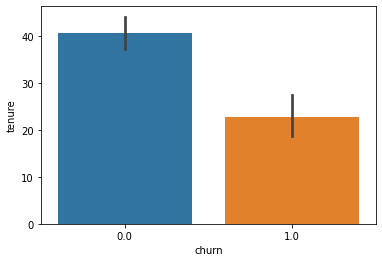

In [11]:
sns.barplot(x=df['churn'], y=df['tenure'])

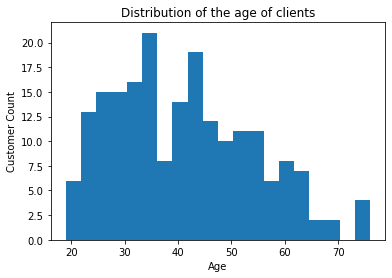

In [12]:
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.title('Distribution of the age of clients')
plt.show()

In [13]:
df['age'].dtype

dtype('float64')

In [14]:
df.age = df.age.astype(int)

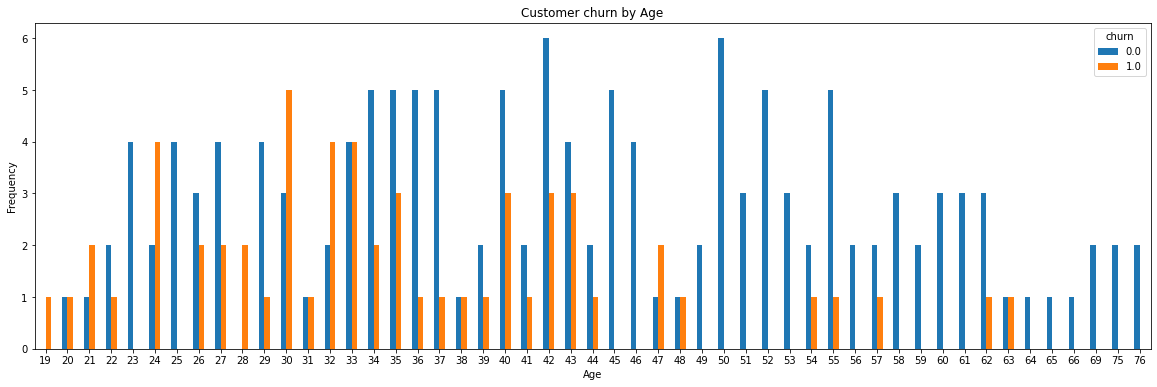

In [15]:
pd.crosstab(df.age, df.churn).plot(kind="bar",figsize=(20,6))
plt.title('Customer churn by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

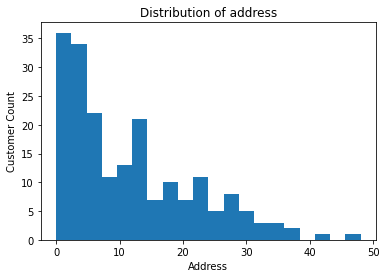

In [16]:
plt.hist(df['address'], bins=20)
plt.xlabel('Address')
plt.ylabel('Customer Count')
plt.title('Distribution of address')
plt.show()

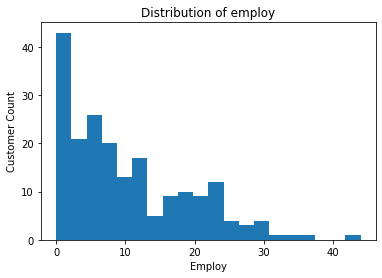

In [17]:
plt.hist(df['employ'], bins=20)
plt.xlabel('Employ')
plt.ylabel('Customer Count')
plt.title('Distribution of employ')
plt.show()

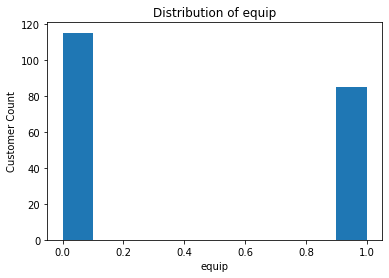

In [18]:
plt.hist(df['equip'])
plt.xlabel('equip')
plt.ylabel('Customer Count')
plt.title('Distribution of equip')
plt.show()

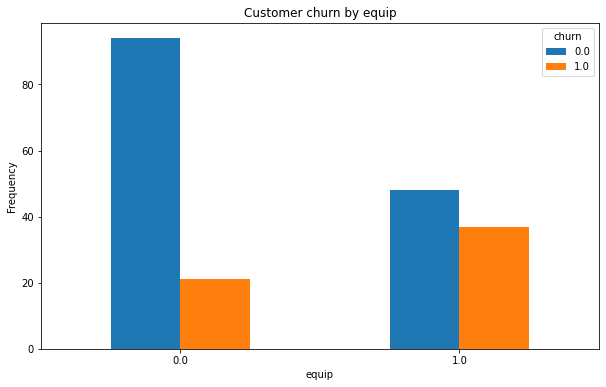

In [19]:
pd.crosstab(df.equip, df.churn).plot(kind="bar",figsize=(10,6))
plt.title('Customer churn by equip')
plt.xlabel('equip')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

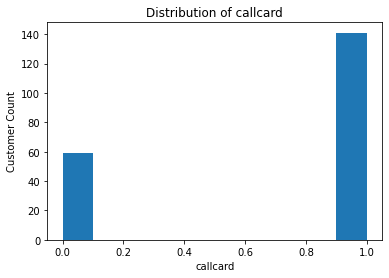

In [20]:
plt.hist(df['callcard'])
plt.xlabel('callcard')
plt.ylabel('Customer Count')
plt.title('Distribution of callcard')
plt.show()

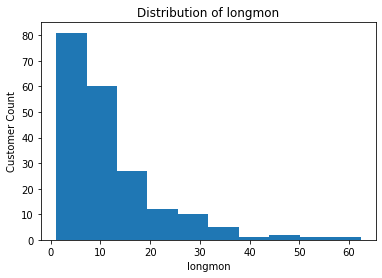

In [21]:
plt.hist(df['longmon'])
plt.xlabel('longmon')
plt.ylabel('Customer Count')
plt.title('Distribution of longmon')
plt.show()

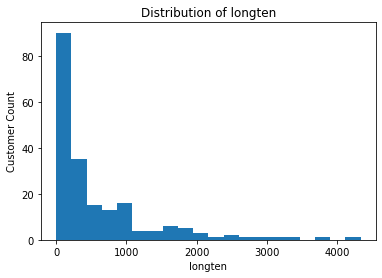

In [22]:
plt.hist(df['longten'], bins=20)
plt.xlabel('longten')
plt.ylabel('Customer Count')
plt.title('Distribution of longten')
plt.show()

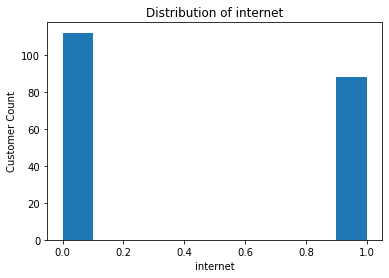

In [23]:
plt.hist(df['internet'])
plt.xlabel('internet')
plt.ylabel('Customer Count')
plt.title('Distribution of internet')
plt.show()

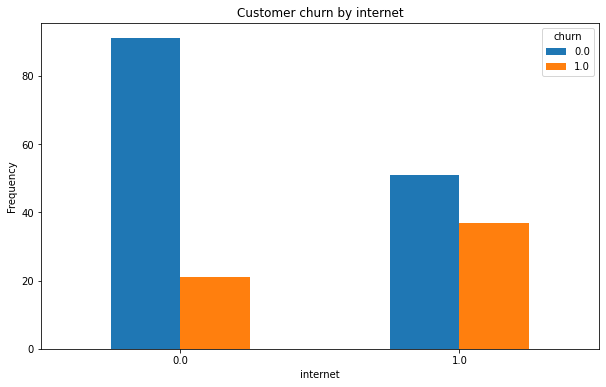

In [24]:
pd.crosstab(df.internet, df.churn).plot(kind="bar",figsize=(10,6))
plt.title('Customer churn by internet')
plt.xlabel('internet')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

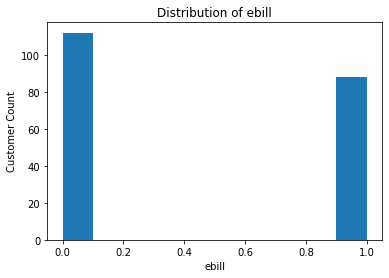

In [25]:
plt.hist(df['ebill'])
plt.xlabel('ebill')
plt.ylabel('Customer Count')
plt.title('Distribution of ebill')
plt.show()

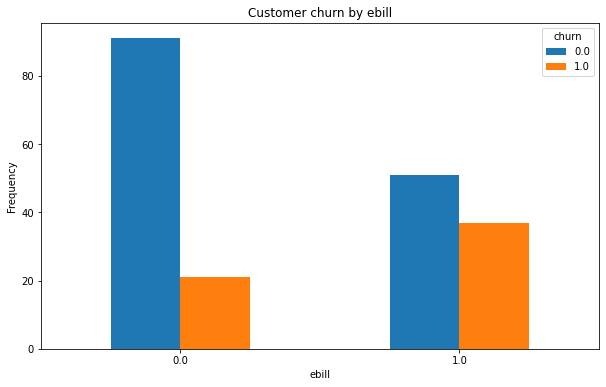

In [26]:
pd.crosstab(df.ebill, df.churn).plot(kind="bar",figsize=(10,6))
plt.title('Customer churn by ebill')
plt.xlabel('ebill')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

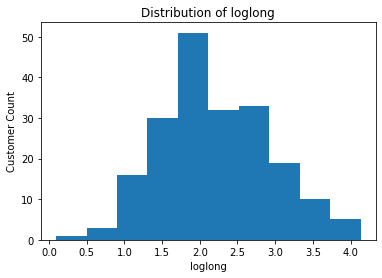

In [27]:
plt.hist(df['loglong'])
plt.xlabel('loglong')
plt.ylabel('Customer Count')
plt.title('Distribution of loglong')
plt.show()

### Preprocessing

In [28]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [29]:
features_df = df.copy()

In [30]:
features_df.drop("income", axis = 1, inplace = True)
features_df.drop("ed", axis = 1, inplace = True)
features_df.drop("wireless", axis = 1, inplace = True)
features_df.drop("tollmon", axis = 1, inplace = True)
features_df.drop("equipmon", axis = 1, inplace = True)
features_df.drop("cardmon", axis = 1, inplace = True)
features_df.drop("wiremon", axis = 1, inplace = True)
features_df.drop("cardten", axis = 1, inplace = True)
features_df.drop("tollten", axis = 1, inplace = True)
features_df.drop("voice", axis = 1, inplace = True)
features_df.drop("pager", axis = 1, inplace = True)
features_df.drop("callwait", axis = 1, inplace = True)
features_df.drop("confer", axis = 1, inplace = True)
features_df.drop("logtoll", axis = 1, inplace = True)
features_df.drop("lninc", axis = 1, inplace = True)
features_df.drop("custcat", axis = 1, inplace = True)

In [31]:
features_df.head()

,tenure,age,address,employ,equip,callcard,longmon,longten,internet,ebill,loglong,churn
0,11.0,33,7.0,5.0,0.0,1.0,4.40,42.00,0.0,0.0,1.482,1.0
1,33.0,33,12.0,0.0,0.0,0.0,9.45,288.80,0.0,0.0,2.246,1.0
2,23.0,30,9.0,2.0,0.0,0.0,6.30,157.05,0.0,0.0,1.841,0.0
3,38.0,35,5.0,10.0,1.0,1.0,6.05,239.55,1.0,1.0,1.800,0.0
4,7.0,35,14.0,15.0,0.0,1.0,7.10,47.45,0.0,0.0,1.960,0.0


In [32]:
targets_df = features_df['churn']
features_df.drop("churn", axis = 1, inplace = True)

In [ ]:
features_df_ns = features_df.copy()

##### Normalization

In [33]:
features_df['tenure'] = features_df['tenure'] / features_df['tenure'].max()
features_df['age'] = features_df['age'] / features_df['age'].max()
features_df['address'] = features_df['address'] / features_df['address'].max()
features_df['longmon'] = features_df['longmon'] / features_df['longmon'].max()
features_df['longten'] = features_df['longten'] / features_df['longten'].max()
features_df['loglong'] = features_df['loglong'] / features_df['loglong'].max()

### Logistic Regression

In [34]:
x = features_df.copy()
y = targets_df.copy()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [36]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred) * 100,"%")

Accuracy score of the model is: 75.0 %


In [37]:
print(confusion_matrix(y_test, y_pred))

[[27  4]
 [ 6  3]]


In [38]:
#precision = True positive / True positive + False Positive
precision = 27 / 31
precision

0.8709677419354839

In [39]:
#recall = True positive / True Positive + False Negative
recall = 27 / 33
recall

0.8181818181818182

In [40]:
#specificity = True Negative / True Negative + False Positive
specificity = 3 / 7
specificity

0.42857142857142855

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>75 %</b>.
* It was right in <b>87 %</b> of the times a positive class was predicted.
* Recognized <b>82 %</b> of all positive, and <b>43 %</b> of all negative examples. 

### K Nearest Neighbor Classifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred1 = knn.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred1) * 100,"%")

Accuracy score of the model is: 77.5 %


In [42]:
print(confusion_matrix(y_test, y_pred1))

[[28  3]
 [ 6  3]]


In [43]:
#precision = True positive / True positive + False Positive
precision = 28 / 31
precision

0.9032258064516129

In [44]:
#recall = True positive / True Positive + False Negative
recall = 27 / 33
recall

0.8181818181818182

In [45]:
#specificity = True Negative / True Negative + False Positive
specificity = 3 / 6
specificity

0.5

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>77.5 %</b>.
* It was right in <b>90 %</b> of the times a positive class was predicted.
* Recognized <b>82 %</b> of all positive, and <b>50 %</b> of all negative examples. 

### Support Vector Classifier

In [46]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred2 = svc.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred2) * 100,"%")

Accuracy score of the model is: 77.5 %


In [47]:
print(confusion_matrix(y_test, y_pred2))

[[31  0]
 [ 9  0]]


In [48]:
#precision = True positive / True positive + False Positive
precision = 31 / 31
precision

1.0

In [49]:
#recall = True positive / True Positive + False Negative
recall = 31 / 40
recall

0.775

In [50]:
#specificity is obviously = 0

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>77.5 %</b>.
* It was right in <b>100 %</b> of the times a positive class was predicted.
* Recognized <b>78 %</b> of all positive, and <b>0 %</b> of all negative examples. 

### Decision Tree Classifier

In [51]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred3 = dtc.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred3) * 100,"%")

Accuracy score of the model is: 72.5 %


In [52]:
print(confusion_matrix(y_test, y_pred3))

[[24  7]
 [ 4  5]]


In [53]:
#precision = True positive / True positive + False Positive
precision = 23 / 31
precision

0.7419354838709677

In [54]:
#recall = True positive / True Positive + False Negative
recall = 23 / 28
recall

0.8214285714285714

In [55]:
#specificity = True Negative / True Negative + False Positive
specificity = 5 / 13
specificity

0.38461538461538464

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>70 %</b>.
* It was right in <b>74 %</b> of the times a positive class was predicted.
* Recognized <b>82 %</b> of all positive, and <b>38 %</b> of all negative examples. 

### Random Forrest Classifier

In [56]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)
y_pred4 = rfc.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred4) * 100,"%")

Accuracy score of the model is: 72.5 %


In [57]:
print(confusion_matrix(y_test, y_pred4))

[[27  4]
 [ 7  2]]


In [58]:
#precision = True positive / True positive + False Positive
precision = 28 / 31
precision

0.9032258064516129

In [59]:
#recall = True positive / True Positive + False Negative
recall = 28 / 35
recall

0.8

In [60]:
#specificity = True Negative / True Negative + False Positive
specificity = 2 / 5
specificity

0.4

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>75 %</b>.
* It was right in <b>90 %</b> of the times a positive class was predicted.
* Recognized <b>80 %</b> of all positive, and <b>40 %</b> of all negative examples. 

### Classification Report

In [61]:
lr_pred_prob = lr.predict_proba(x_test)
knn_pred_prob = knn.predict_proba(x_test)
dtc_pred_prob = dtc.predict_proba(x_test)
rfc_pred_prob = rfc.predict_proba(x_test)

In [62]:
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_test, lr_pred_prob[:,1], pos_label=1)
knn_fpr, knn_tpr, knn_thresh = roc_curve(y_test, knn_pred_prob[:,1], pos_label=1)
dtc_fpr, dtc_tpr, dtc_thresh = roc_curve(y_test, dtc_pred_prob[:,1], pos_label=1)
rfc_fpr, rfc_tpr, rfc_thresh = roc_curve(y_test, rfc_pred_prob[:,1], pos_label=1)

In [63]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

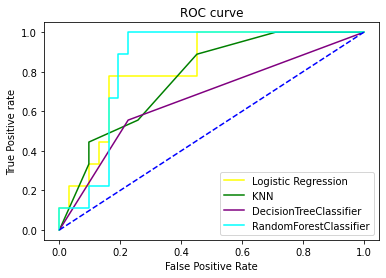

In [64]:
plt.plot(lr_fpr, lr_tpr, linestyle='-',color='yellow', label='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, linestyle='-',color='green', label='KNN')
plt.plot(dtc_fpr, dtc_tpr, linestyle='-',color='purple', label='DecisionTreeClassifier')
plt.plot(rfc_fpr, rfc_tpr, linestyle='-',color='cyan', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()


Algorithm     | Accuracy  | Precision | Recall | Specificity |
------------- | --------- | ------    | -----  | -----|
LR            | 75        | 87        | 82     | 43
KNN           | 77.5      | 90        | 82     | 50
SVM           | 77.5      | 100       | 78     | 0
DTC           | 70        | 74        | 82     | 38
RFC           | 75        | 90        | 80     | 40

Based on the ROC curve, it looks like the RandomForestClassifier is the best performing model, but the classification evaluation metrics are pointing towards the KNearestNeighborsClassifier.